<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Final Project</div>
<div style="text-align: right">Yuchuan Lin, Zixiao Wang, 9 December 2019, with material from Dino Konstantopoulos</div>

# Final Project by NB
* [Part1: Show Up histogram ](#-Part1-:-person-show-up-count-histogram)
* [Part2: Person Relationship Network graph](#Part2:-person-relationship-network-graph)

## -Part1 : person show up count histogram 

###     NO.1 Book: Godfather

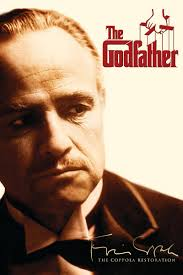

[['Don', 956], ['Michael', 819], ['Hagen', 599], ['Sonny', 454], ['Johnny', 419], ['Clemenza', 295], ['Kay', 256], ['Don Corleone', 220], ['Carlo', 165], ['Tessio', 162], ['Vito', 150], ['Fontane', 142], ['Jules', 136], ['Neri', 125], ['Mike', 123]]
           names  counts
0            Don     956
1        Michael     819
2          Hagen     599
3          Sonny     454
4         Johnny     419
5       Clemenza     295
6            Kay     256
7   Don Corleone     220
8          Carlo     165
9         Tessio     162
10          Vito     150
11       Fontane     142
12         Jules     136
13          Neri     125
14          Mike     123


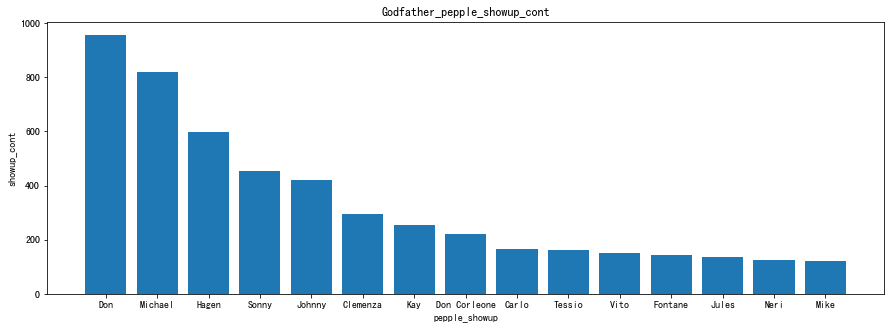

In [34]:
with open('name.txt', 'r') as f:
    names = list(set(name.strip() for name in f.readlines()))


with open('The Godfather - Mario Puzo (1).txt', 'r') as f:
    content = list(line.strip() for line in f.readlines())


def find_pepple_showup_cont(num=15):
    '''
    count times for each person to show up

    '''
    novel = ''.join(content)
    showup_counts = []
    for name in names:
        showup_counts.append([name, novel.count(name)])
    showup_counts.sort(key=lambda v: v[1], reverse=True)

    return showup_counts[:num]

showup_10 = find_pepple_showup_cont()
print(showup_10)

import pandas as pd
show = pd.DataFrame(showup_10, columns=['names', 'counts'])
print(show)

import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

data = list(show.counts)
index = list(show.names)

plt.figure(figsize = (15,5))

plt.bar(range(len(data)), data, tick_label=index)
plt.xlabel('pepple_showup')
plt.ylabel('showup_cont')
plt.title('Godfather_pepple_showup_cont')
plt.savefig('godf.jpg')

### NO.2 Book: Wolf Totem


<img style="height:500px" src = "http://i-7.vcimg.com/crop/da86a8ea326c2ae5a84e25a802f26128364841(600x)/thumb.jpg">

[['陈阵', 4483], ['小狼', 3303], ['老人', 1442], ['杨克', 1264], ['巴图', 614], ['毕利格', 573], ['包顺贵', 562], ['马倌', 537], ['张继原', 512], ['母狼', 425], ['二郎', 379], ['乌力吉', 344], ['阿爸', 306], ['嘎斯迈', 290], ['道尔', 278]]
   names  counts
0     陈阵    4483
1     小狼    3303
2     老人    1442
3     杨克    1264
4     巴图     614
5    毕利格     573
6    包顺贵     562
7     马倌     537
8    张继原     512
9     母狼     425
10    二郎     379
11   乌力吉     344
12    阿爸     306
13   嘎斯迈     290
14    道尔     278


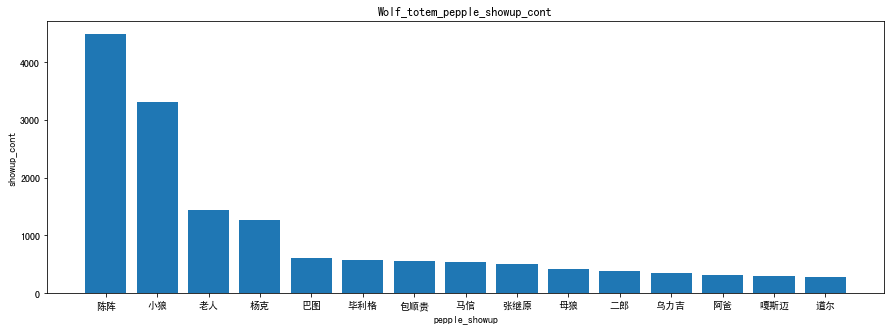

In [35]:
with open('name2.txt', 'r') as f:
    names = list(set(name.strip() for name in f.readlines()))


with open('totem of wolf.txt', 'r') as f:
    content = list(line.strip() for line in f.readlines())


def find_pepple_showup_cont(num=15):
    '''
    count times for each person to show up
    
    '''
    novel = ''.join(content)
    showup_counts = []
    for name in names:
        showup_counts.append([name, novel.count(name)])
    showup_counts.sort(key=lambda v: v[1], reverse=True)

    return showup_counts[:num]

showup_10 = find_pepple_showup_cont()
print(showup_10)

import pandas as pd
show = pd.DataFrame(showup_10, columns=['names', 'counts'])
print(show)

import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

data = list(show.counts)
index = list(show.names)

# tried several times to get right space between each label
plt.figure(figsize = (15,5))
# plt.xticks(fontsize = 20)

plt.bar(range(len(data)), data, tick_label=index)
plt.xlabel('pepple_showup')
plt.ylabel('showup_cont')
plt.title('Wolf_totem_pepple_showup_cont')
plt.savefig('wolf.jpg')
# plt.figure(figsize = (300,100))


## Part2: Person Relationship Network graph

###     NO.1 Book: Godfather

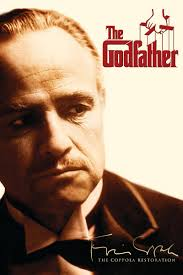

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [37]:
# import book file
data = pd.read_csv('People_edge.txt')

# because txt file may not has columns we need
new = data["Source Target Weight"].str.split(" ", n = 2, expand = True) 
  
# making separate first name column from new data frame 
data["Source"]= new[0] 
  
# making separate last name column from new data frame 
data["Target"]= new[1] 
data["Weight"]= new[2] 

# drop the original whole mixed column
data = data.drop(["Source Target Weight"],axis = 1)
data.head()

,Source,Target,Weight
0,Don,Michael,75
1,Don,Hagen,114
2,Don,Sonny,32
3,Don,Johnny,25
4,Don,Clemenza,17


In [38]:
G_got1=data
got1=data

In [39]:

G_got1 = nx.Graph()
for row in got1.iterrows():
    G_got1.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['Weight'])

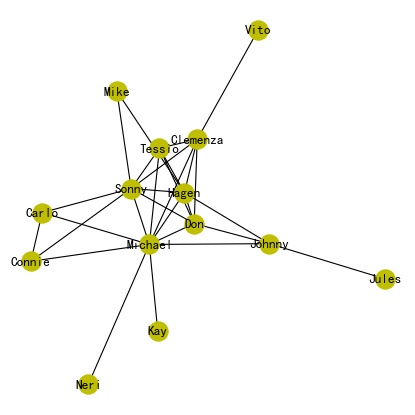

In [40]:
plt.figure(figsize=(5, 5), dpi=80)
nx.draw(G_got1, node_color='y', with_labels=True)
plt.savefig("graph.png", dpi=250)
plt.show()

### NO.2 Book: Wolf Totem


<img style="height:500px" src = "http://i-7.vcimg.com/crop/da86a8ea326c2ae5a84e25a802f26128364841(600x)/thumb.jpg">

In [42]:
# import book file
data2 = pd.read_csv('People_edge2.txt')

# because txt file may not has columns we need
new = data2["Source Target Weight"].str.split(" ", n = 2, expand = True) 
  
# making separate first name column from new data frame 
data2["Source"]= new[0] 
  
# making separate last name column from new data frame 
data2["Target"]= new[1] 
data2["Weight"]= new[2] 

# drop the original whole column

data2 = data2.drop(["Source Target Weight"],axis = 1)
data2.head()

,Source,Target,Weight
0,祖先,陈阵,36
1,祖先,草原,32
2,祖先,小狼,26
3,陈阵,望远镜,140
4,陈阵,毕利格,642


In [43]:
G_got12=data2
got12=data2

In [44]:
G_got12 = nx.Graph()
for row in got12.iterrows():
    G_got12.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['Weight'])

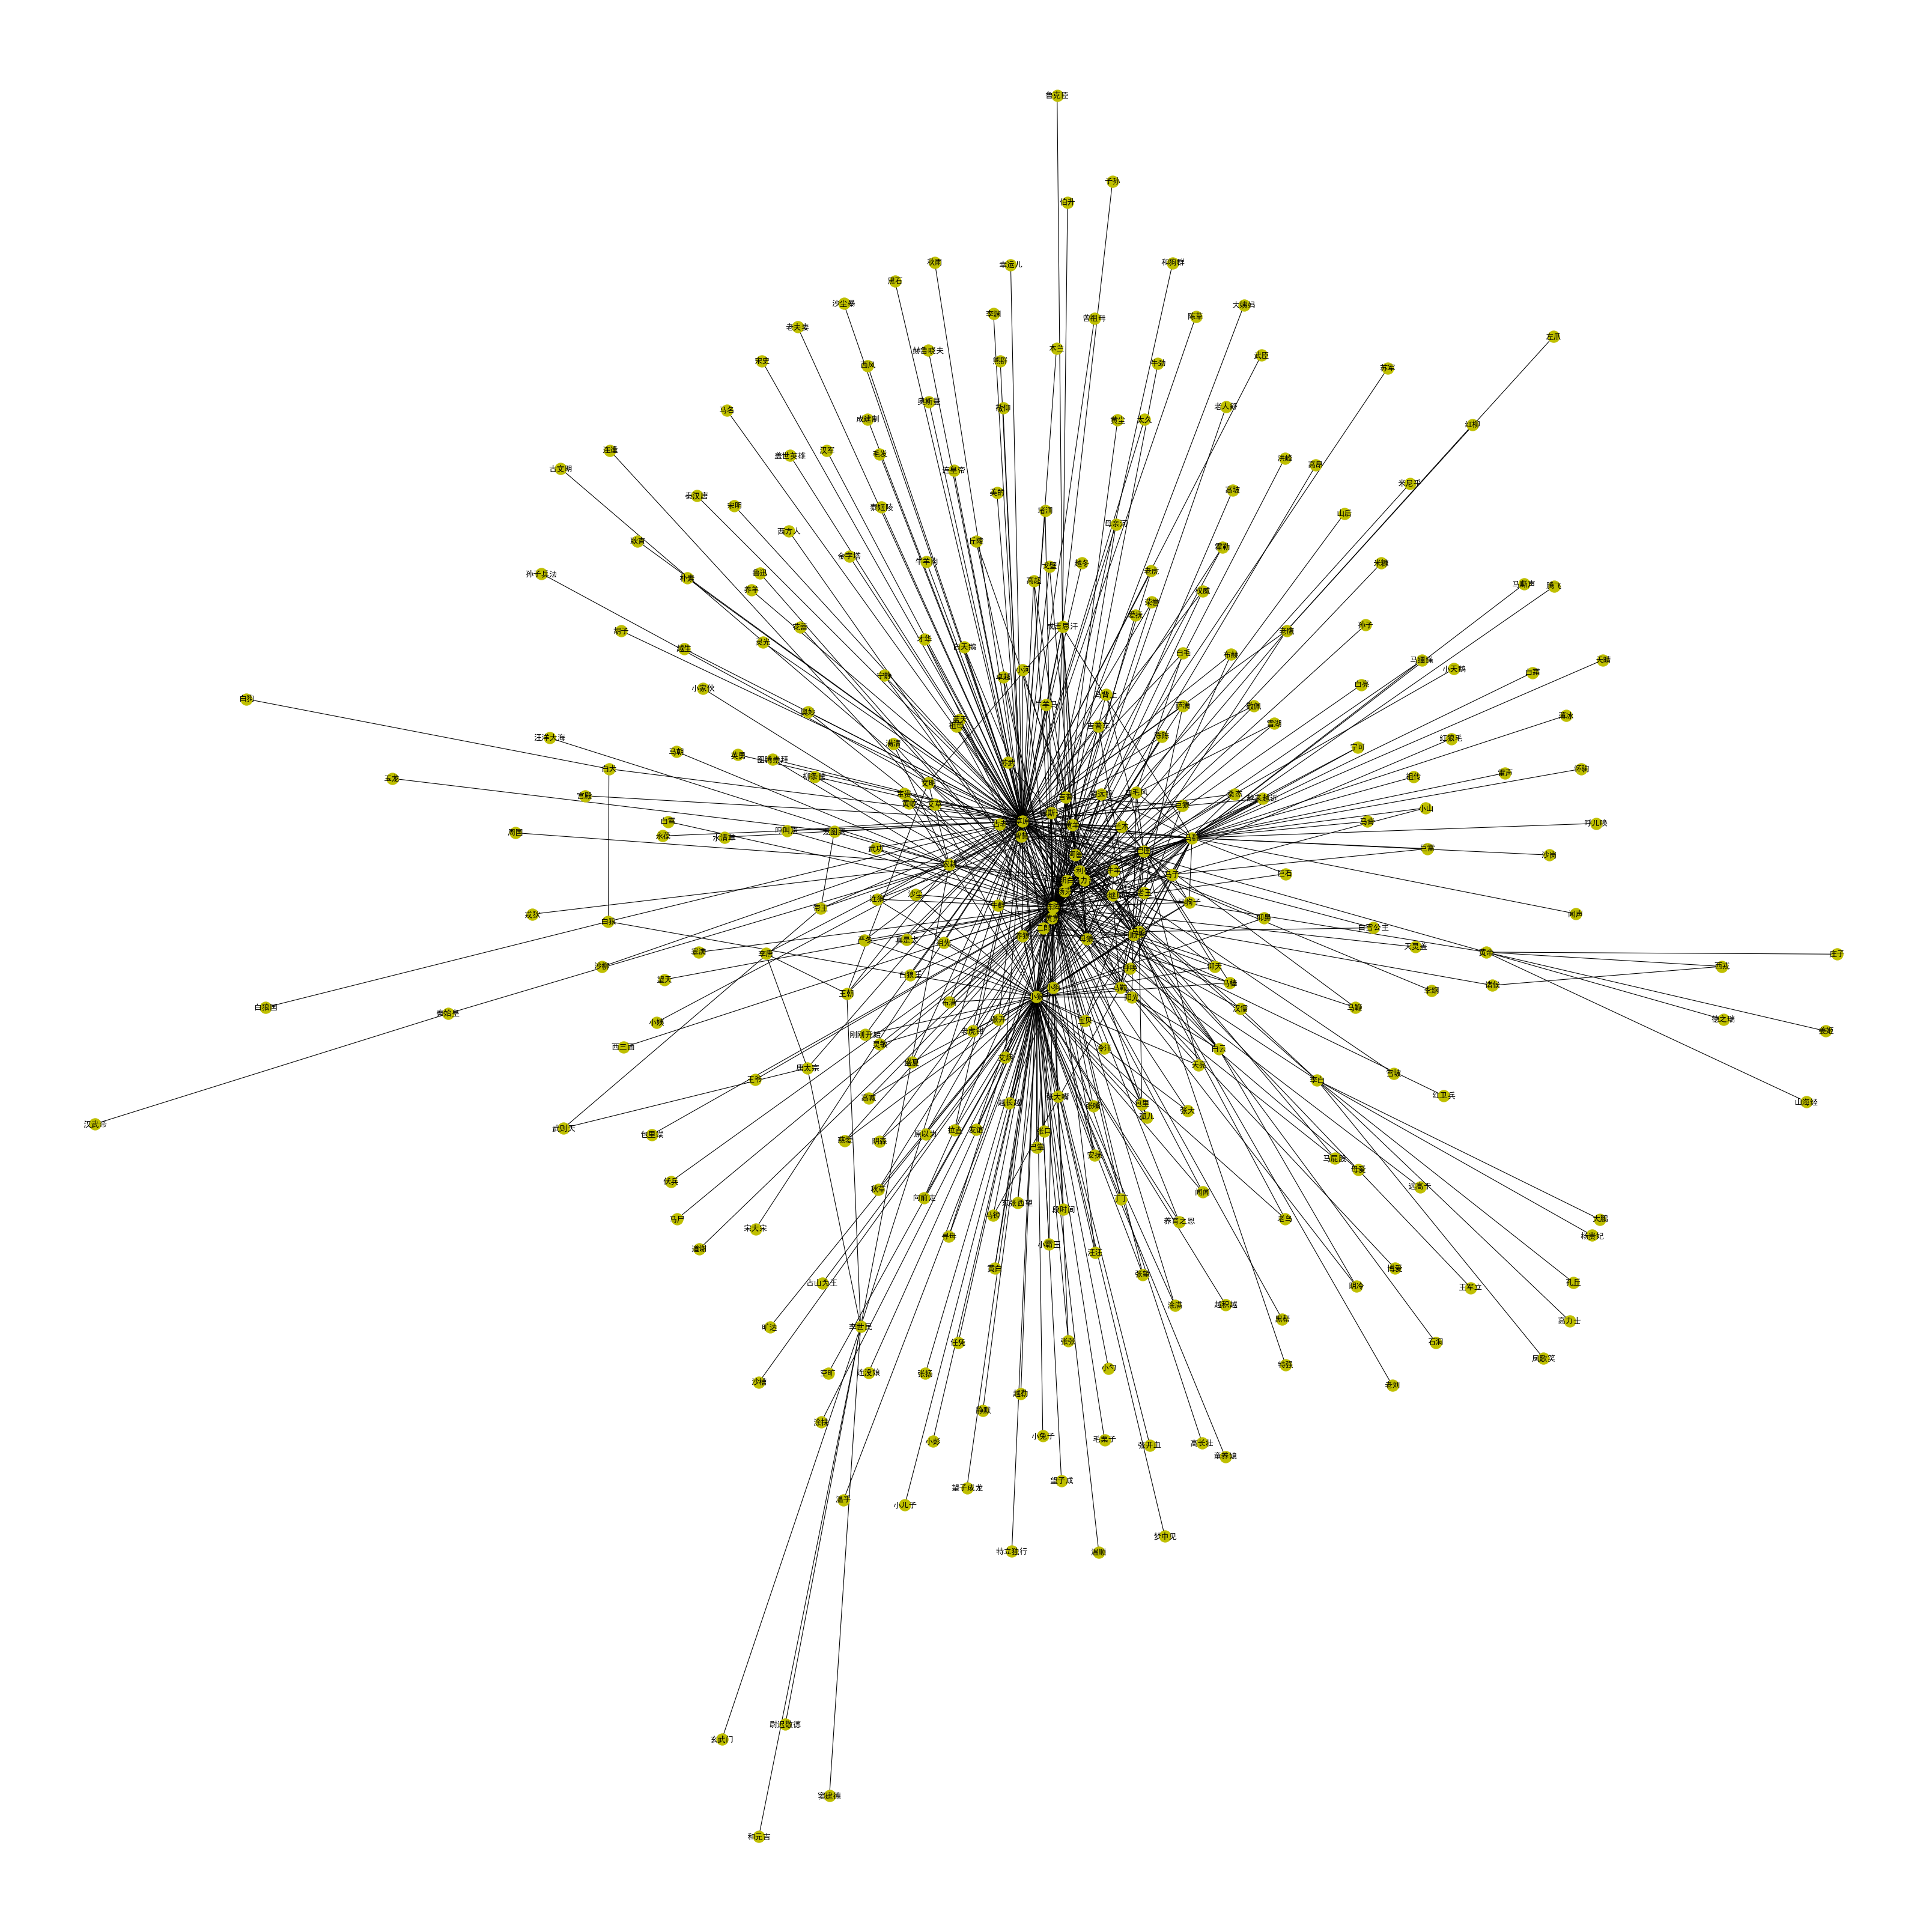

In [45]:
plt.figure(figsize=(40, 40), dpi=80)
nx.draw(G_got12, node_color='y', with_labels=True)
plt.savefig("graph2.png", dpi=250)
plt.show()